In [1]:
import os.path
import glob

import paws.api
import pickle

import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
paw = paws.api.start()
paw.add_wf('classifier_test')
paw.activate_op('IO.CSV.CSVToXYData')
paw.activate_op('PROCESSING.SAXS.SpectrumProfiler')
paw.activate_op('PROCESSING.SAXS.SpectrumClassifier')

paw.add_op('read_csv','IO.CSV.CSVToXYData')
paw.add_op('profile','PROCESSING.SAXS.SpectrumProfiler')
paw.add_op('classify','PROCESSING.SAXS.SpectrumClassifier')

paw.set_input('profile','q','read_csv.outputs.x')
paw.set_input('profile','I','read_csv.outputs.y')

Enabling Operation IO.CSV.CSVToXYData...
Finished enabling IO.CSV.CSVToXYData
Enabling Operation PROCESSING.SAXS.SpectrumProfiler...
Finished enabling PROCESSING.SAXS.SpectrumProfiler
Enabling Operation PROCESSING.SAXS.SpectrumClassifier...
Finished enabling PROCESSING.SAXS.SpectrumClassifier


In [3]:
with open('scalers_and_models.pkl', 'rb') as fid:
    s_and_m = pickle.load(fid)

scalers = s_and_m['scalers'] # dict of scalers
models = s_and_m['models'] # dict of models

In [4]:
paw.set_input('classify','scalers',scalers,'auto')
paw.set_input('classify','classifiers',models,'auto')

paw.set_input('classify','profiler_output','profile.outputs.features')

# Testing PAWS on The Testing Set

In [5]:
test = pd.read_pickle('paws_test.pkl')
test.head()

,name,q_Imax,Imax_over_Imean,Imax_over_Ilowq,Imax_over_Ihighq,Imax_sharpness,low_q_ratio,high_q_ratio,log_fluctuation,0,...,95,96,97,98,99,bad_data,form,precursor,structure,str_label
1453,R7/R7_SAXS_0061_dz_bgsub,0.070,54.279213,35.025656,5148.683686,2.072658,0.996221,0.003749,10.239152,0.0,...,0.0,0.0,0.0,0.0,0.0,False,True,False,True,form_structure
862,R3/R3_cool_0041_dz_bgsub,0.052,32.572613,20.970892,7780.293842,1.664051,0.998494,0.001490,2.642981,0.0,...,0.0,0.0,0.0,0.0,0.0,False,True,True,True,form_precursor_structure
413,R12/R12cooling2rd_0006_dz_bgsub,0.040,15.597771,10.082157,1020.818642,1.026497,0.994472,0.005507,7.211712,0.0,...,0.0,0.0,0.0,0.0,0.0,False,True,False,False,form_
162,R1/R1_addOAC1_0015_dz_bgsub,0.040,18.734042,12.065037,3715.888830,1.036291,0.998166,0.001824,9.022609,0.0,...,0.0,0.0,0.0,0.0,0.0,False,True,False,False,form_
1879,Reaction_G/G_60C_10min_0214163030_0001_dz_bgsub,0.040,3.738025,2.699466,12.156567,1.140351,0.889271,0.109591,8.257134,0.0,...,0.0,0.0,0.0,0.0,0.0,False,False,True,False,precursor_


In [6]:
test.shape

(200, 114)

In [7]:
names = list(test['name'])
files_to_test = []
for f in names:
    f = '2016_saxs_data/' + f + '.csv'
    files_to_test.append(f)

In [8]:
bad_data_labels = []
bad_data_pr = []
form_factor_scattering = []
form_pr = []
precursor_scattering = []
prec_pr = []
diffraction_peaks = []
peaks_pr = []

for fname in files_to_test:
    paw.set_input('read_csv','file_path',fname)
    paw.execute()
    f = paw.get_output('classify','population_flags')
    print(f)

    bad_data_labels.append(f['bad_data'][0])
    bad_data_pr.append(f['bad_data'][1])
    form_factor_scattering.append(f['form_factor_scattering'][0])
    form_pr.append(f['form_factor_scattering'][1])
    precursor_scattering.append(f['precursor_scattering'][0])
    prec_pr.append(f['precursor_scattering'][1])
    diffraction_peaks.append(f['diffraction_peaks'][0])
    peaks_pr.append(f['diffraction_peaks'][1])

running: ['read_csv']
running: ['profile']
running: ['classify']
execution finished
OrderedDict([('test', True), ('bad_data', (False, 1.0)), ('form_factor_scattering', (True, 0.99999999999999956)), ('precursor_scattering', (False, 0.99999999999999512)), ('diffraction_peaks', (True, 1.0))])
running: ['read_csv']
running: ['profile']
running: ['classify']
execution finished
OrderedDict([('test', True), ('bad_data', (False, 0.99999999999999989)), ('form_factor_scattering', (True, 0.99999999999999778)), ('precursor_scattering', (True, 0.99983035144704091)), ('diffraction_peaks', (True, 1.0))])
running: ['read_csv']
running: ['profile']
running: ['classify']
execution finished
OrderedDict([('test', True), ('bad_data', (False, 0.99999999999999956)), ('form_factor_scattering', (True, 0.99999999999997935)), ('precursor_scattering', (False, 0.99999999964258668)), ('diffraction_peaks', (False, 0.99999998735274409))])
running: ['read_csv']
running: ['profile']
running: ['classify']
execution fini

running: ['profile']
running: ['classify']
execution finished
OrderedDict([('test', True), ('bad_data', (False, 0.99999999999999967)), ('form_factor_scattering', (True, 0.99999999999994804)), ('precursor_scattering', (False, 0.99999999999999201)), ('diffraction_peaks', (True, 1.0))])
running: ['read_csv']
running: ['profile']
running: ['classify']
execution finished
OrderedDict([('test', True), ('bad_data', (False, 0.99999999999999967)), ('form_factor_scattering', (True, 0.99999999999998868)), ('precursor_scattering', (False, 0.99999999919604432)), ('diffraction_peaks', (False, 0.99999962077075732))])
running: ['read_csv']
running: ['profile']
running: ['classify']
execution finished
OrderedDict([('test', True), ('bad_data', (False, 0.99999999999999989)), ('form_factor_scattering', (True, 0.9999999999998328)), ('precursor_scattering', (False, 0.99999999999999845)), ('diffraction_peaks', (True, 1.0))])
running: ['read_csv']
running: ['profile']
running: ['classify']
execution finished
O

running: ['classify']
execution finished
OrderedDict([('test', True), ('bad_data', (False, 0.99999999999999978)), ('form_factor_scattering', (True, 0.99999999999996581)), ('precursor_scattering', (False, 0.99999999999998923)), ('diffraction_peaks', (False, 0.99999999999999578))])
running: ['read_csv']
running: ['profile']
running: ['classify']
execution finished
OrderedDict([('test', True), ('bad_data', (False, 0.99999999999999978)), ('form_factor_scattering', (True, 0.99999999999996891)), ('precursor_scattering', (False, 0.99999999999999978)), ('diffraction_peaks', (False, 0.99999999999999944))])
running: ['read_csv']
running: ['profile']
running: ['classify']
execution finished
OrderedDict([('test', True), ('bad_data', (False, 0.99999999999999967)), ('form_factor_scattering', (True, 0.99999999999999734)), ('precursor_scattering', (False, 0.99955929823956702)), ('diffraction_peaks', (False, 1.0))])
running: ['read_csv']
running: ['profile']
running: ['classify']
execution finished
Ord

running: ['profile']
running: ['classify']
execution finished
OrderedDict([('test', True), ('bad_data', (False, 0.99999999999999967)), ('form_factor_scattering', (True, 0.99999999999999978)), ('precursor_scattering', (False, 0.99130083743000363)), ('diffraction_peaks', (False, 1.0))])
running: ['read_csv']
running: ['profile']
running: ['classify']
execution finished
OrderedDict([('test', True), ('bad_data', (False, 0.99999999999999978)), ('form_factor_scattering', (True, 0.99999999999974243)), ('precursor_scattering', (False, 0.9999872209955355)), ('diffraction_peaks', (True, 1.0))])
running: ['read_csv']
running: ['profile']
running: ['classify']
execution finished
OrderedDict([('test', True), ('bad_data', (False, 0.99999999999999978)), ('form_factor_scattering', (True, 0.99999999999999845)), ('precursor_scattering', (False, 0.75410354474496522)), ('diffraction_peaks', (False, 0.99999742964556237))])
running: ['read_csv']
running: ['profile']
running: ['classify']
execution finished


running: ['classify']
execution finished
OrderedDict([('test', True), ('bad_data', (False, 0.99999999999999989)), ('form_factor_scattering', (True, 0.99999999999992073)), ('precursor_scattering', (False, 0.99999999999757672)), ('diffraction_peaks', (True, 1.0))])
running: ['read_csv']
running: ['profile']
running: ['classify']
execution finished
OrderedDict([('test', True), ('bad_data', (False, 0.99945867536104649)), ('form_factor_scattering', (False, 0.99999585377056355)), ('precursor_scattering', (True, 1.0)), ('diffraction_peaks', (False, 1.0))])
running: ['read_csv']
running: ['profile']
running: ['classify']
execution finished
OrderedDict([('test', True), ('bad_data', (False, 0.99999999999999989)), ('form_factor_scattering', (True, 0.99999999999994826)), ('precursor_scattering', (False, 0.9999907980843078)), ('diffraction_peaks', (True, 1.0))])
running: ['read_csv']
running: ['profile']
running: ['classify']
execution finished
OrderedDict([('test', True), ('bad_data', (False, 0.99

running: ['classify']
execution finished
OrderedDict([('test', True), ('bad_data', (True, 0.99592542666113282)), ('precursor_scattering', (False, None)), ('form_factor_scattering', (False, None)), ('diffraction_peaks', (False, None))])
running: ['read_csv']
running: ['profile']
running: ['classify']
execution finished
OrderedDict([('test', True), ('bad_data', (False, 0.99999999999999989)), ('form_factor_scattering', (True, 0.99999999999999822)), ('precursor_scattering', (True, 0.9971331381893993)), ('diffraction_peaks', (True, 1.0))])
running: ['read_csv']
running: ['profile']
running: ['classify']
execution finished
OrderedDict([('test', True), ('bad_data', (False, 0.99999999999990752)), ('form_factor_scattering', (True, 0.99999999280721918)), ('precursor_scattering', (True, 1.0)), ('diffraction_peaks', (False, 1.0))])
running: ['read_csv']
running: ['profile']
running: ['classify']
execution finished
OrderedDict([('test', True), ('bad_data', (False, 0.99999999999999967)), ('form_fact

running: ['profile']
running: ['classify']
execution finished
OrderedDict([('test', True), ('bad_data', (False, 0.9999999999999738)), ('form_factor_scattering', (True, 0.99999999989153676)), ('precursor_scattering', (True, 1.0)), ('diffraction_peaks', (False, 1.0))])
running: ['read_csv']
running: ['profile']
running: ['classify']
execution finished
OrderedDict([('test', True), ('bad_data', (False, 0.99999999999999967)), ('form_factor_scattering', (True, 0.99999999999999711)), ('precursor_scattering', (False, 0.9962936955159406)), ('diffraction_peaks', (False, 1.0))])
running: ['read_csv']
running: ['profile']
running: ['classify']
execution finished
OrderedDict([('test', True), ('bad_data', (False, 0.99999999999999967)), ('form_factor_scattering', (True, 0.99999999999999822)), ('precursor_scattering', (False, 0.99999997643457295)), ('diffraction_peaks', (True, 1.0))])
running: ['read_csv']
running: ['profile']
running: ['classify']
execution finished
OrderedDict([('test', True), ('bad

In [18]:
test['paws_pr_bad_data'] =  bad_data_labels
test['paws_pr_bad_data_pr'] =  bad_data_pr # propability to have this bad_data label
test['paws_pr_form'] =  form_factor_scattering
test['paws_pr_form_pr'] =  form_pr
test['paws_pr_precursor'] =  precursor_scattering
test['paws_pr_precursor_pr'] =  prec_pr
test['paws_pr_structure'] =  diffraction_peaks
test['paws_pr_structure_pr'] =  peaks_pr

In [19]:
accuracy_score(test['bad_data'], test['paws_pr_bad_data'])

1.0

In [20]:
accuracy_score(test['form'], test['paws_pr_form'])

0.995

In [21]:
accuracy_score(test['precursor'], test['paws_pr_precursor'])

0.95999999999999996

In [22]:
accuracy_score(test['structure'], test['paws_pr_structure'])

0.995

## Bad_Data

In [23]:
accuracy_score(test['bad_data'], test['paws_pr_bad_data'])

1.0

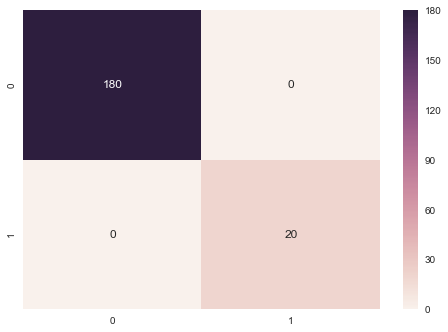

In [24]:
cnf_matrix = confusion_matrix(test['bad_data'], test['paws_pr_bad_data'])
sns.heatmap(cnf_matrix, annot=True, fmt='.5g')

## Form

In [25]:
accuracy_score(test['form'], test['paws_pr_form'])

0.995

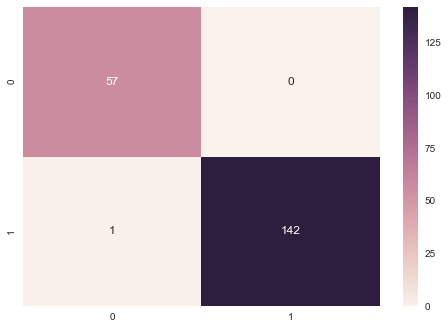

In [26]:
cnf_matrix = confusion_matrix(test['form'], test['paws_pr_form'])
sns.heatmap(cnf_matrix, annot=True, fmt='.5g')

We have 1 false negative:

In [33]:
difference = test[test['form'] != test['paws_pr_form']]
difference[['name', 'str_label','form','paws_pr_form', 'paws_pr_form_pr']]

,name,str_label,form,paws_pr_form,paws_pr_form_pr
1225,R5/R5_SAXS_0029_dz_bgsub,form_precursor_,True,False,0.995286


The algorithm is very sure that label should be "False."

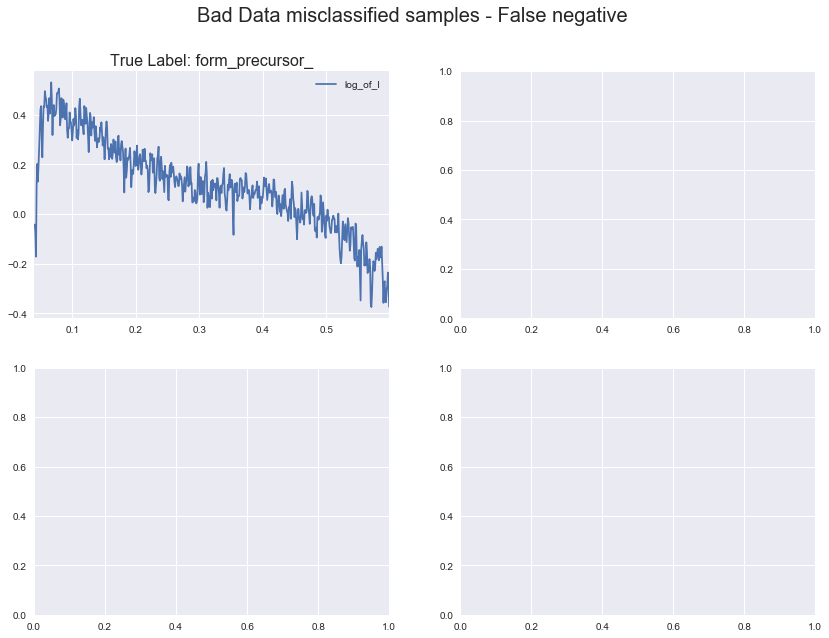

In [34]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,10))
st = fig.suptitle("Bad Data misclassified samples - False negative", fontsize=20)
st.set_y(0.97)

for n in range(len(difference)): 
    d = difference.iloc[n]
    file_name = d.iloc[0]
    str_label = difference.iloc[n]['str_label']
    df_v = pd.read_csv('2016_saxs_data/' + file_name + '.csv')
    df_v['log_of_I'] = np.log10(df_v[' Intensity (counts)'])
    df_v.plot(x='# q (1/Angstrom)',y='log_of_I', ax=axes[n%2, n//2])
    axes[n%2, n//2].set_title('True Label: ' + str_label, fontsize=16);
    axes[n%2, n//2].xaxis.label.set_visible(False)

## Precursor

In [35]:
accuracy_score(test['precursor'], test['paws_pr_precursor'])

0.95999999999999996

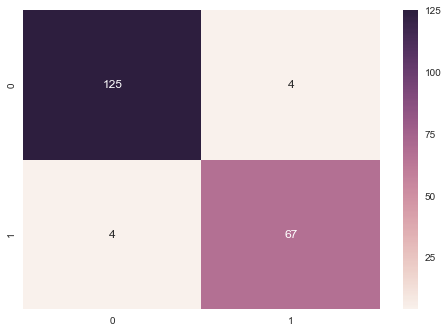

In [36]:
cnf_matrix = confusion_matrix(test['precursor'], test['paws_pr_precursor'])
sns.heatmap(cnf_matrix, annot=True, fmt='.5g')

We have 4 false negative and 4 false positive:

In [37]:
difference = test[test['precursor'] != test['paws_pr_precursor']]
difference[['name', 'str_label','precursor','paws_pr_precursor','paws_pr_precursor_pr']]

,name,str_label,precursor,paws_pr_precursor,paws_pr_precursor_pr
1545,Reaction_A/A_colling_60C_0212122720_0001_dz_bgsub,form_structure,False,True,0.999062
1244,R5/R5_SAXS_0048_dz_bgsub,form_precursor_structure,True,False,0.997834
1485,Reaction_A/A_245C_0212114602_0001_dz_bgsub,form_precursor_,True,False,0.909265
1796,Reaction_E/E_270C_0213202445_0001_dz_bgsub,form_precursor_,True,False,0.991301
1917,Reaction_H/H_280C_0214203949_0001_dz_bgsub,form_,False,True,0.818276
1495,Reaction_A/A_272C_0212115023_0001_dz_bgsub,form_structure,False,True,1.000000
1870,Reaction_G/G_280C_15min_0214173702_0001_dz_bgsub,form_structure,False,True,0.559636
1905,Reaction_H/H_263C_0214203533_0001_dz_bgsub,form_precursor_,True,False,0.932172


Only for one sample from eight the propability is about 50/50. 

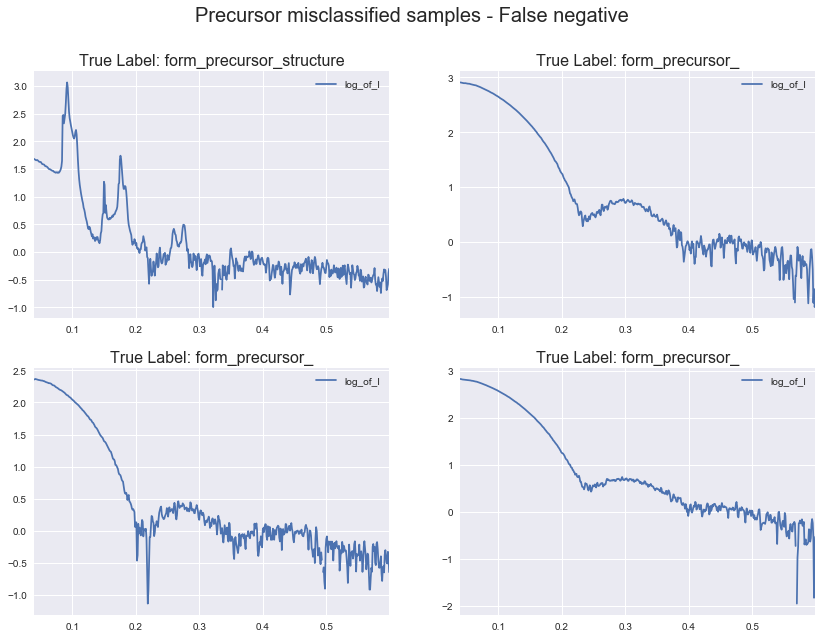

In [38]:
false_negative = difference[difference['precursor'] == True]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,10))
st = fig.suptitle("Precursor misclassified samples - False negative", fontsize=20)
st.set_y(0.97)

for n in range(len(false_negative)): 
    d = false_negative.iloc[n]
    file_name = d.iloc[0]
    str_label = false_negative.iloc[n]['str_label']
    df_v = pd.read_csv('2016_saxs_data/' + file_name + '.csv')
    df_v['log_of_I'] = np.log10(df_v[' Intensity (counts)'])
    df_v.plot(x='# q (1/Angstrom)',y='log_of_I', ax=axes[n%2, n//2])
    axes[n%2, n//2].set_title('True Label: ' + str_label, fontsize=16);
    axes[n%2, n//2].xaxis.label.set_visible(False)

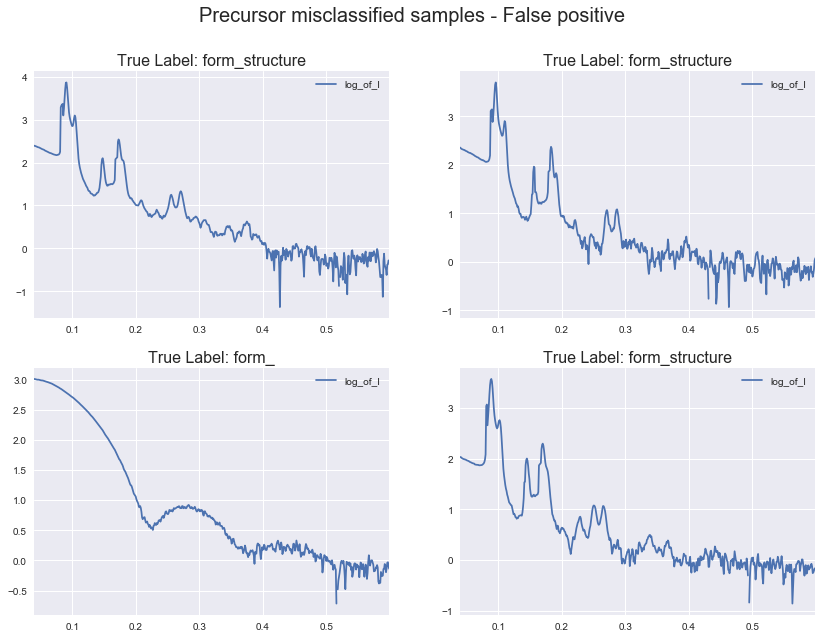

In [39]:
false_positive = difference[difference['precursor'] == False]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,10))
st = fig.suptitle("Precursor misclassified samples - False positive", fontsize=20)
st.set_y(0.97)

for n in range(len(false_positive)): 
    d = false_positive.iloc[n]
    file_name = d.iloc[0]
    str_label = false_positive.iloc[n]['str_label']
    df_v = pd.read_csv('2016_saxs_data/' + file_name + '.csv')
    df_v['log_of_I'] = np.log10(df_v[' Intensity (counts)'])
    df_v.plot(x='# q (1/Angstrom)',y='log_of_I', ax=axes[n%2, n//2])
    axes[n%2, n//2].set_title('True Label: ' + str_label, fontsize=16);
    axes[n%2, n//2].xaxis.label.set_visible(False)

## Structure

In [40]:
accuracy_score(test['structure'], test['paws_pr_structure'])

0.995

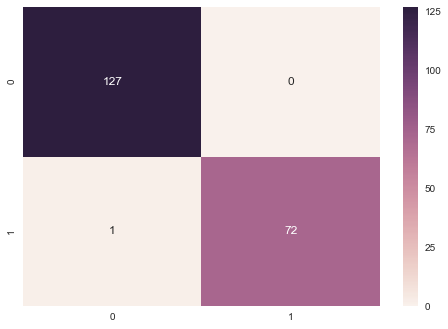

In [41]:
cnf_matrix = confusion_matrix(test['structure'], test['paws_pr_structure'])
sns.heatmap(cnf_matrix, annot=True, fmt='.5g')

In [43]:
difference = test[test['structure'] != test['paws_pr_structure']]
difference[['name', 'str_label','structure','paws_pr_structure', 'paws_pr_structure_pr']]

,name,str_label,structure,paws_pr_structure,paws_pr_structure_pr
785,R2/R2_SAXS_0039_dz_bgsub,form_precursor_structure,True,False,1.0


Again, the algorithm is very sure that the label should be "False."

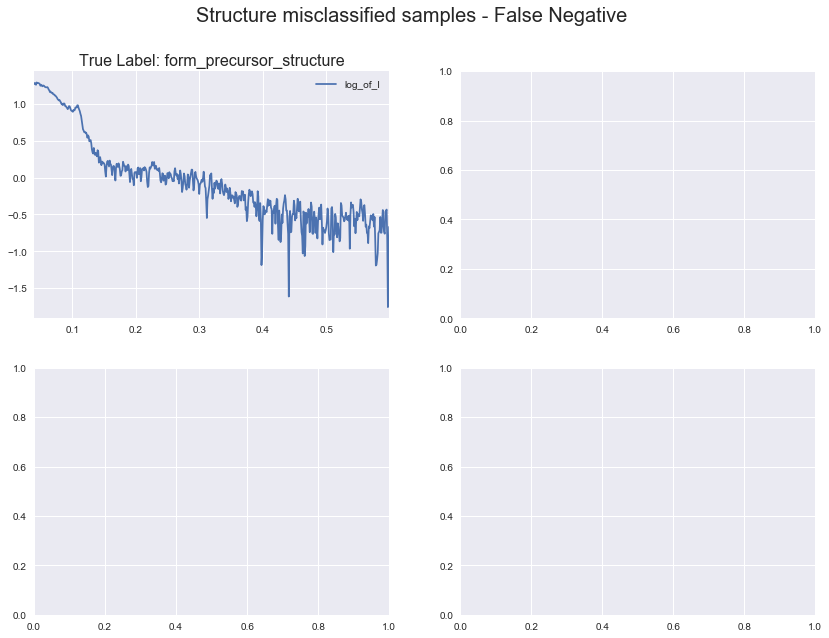

In [44]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,10))
st = fig.suptitle("Structure misclassified samples - False Negative", fontsize=20)
st.set_y(0.97)

for n in range(len(difference)): 
    d = difference.iloc[n]
    file_name = d.iloc[0]
    str_label = difference.iloc[n]['str_label']
    df_v = pd.read_csv('2016_saxs_data/' + file_name + '.csv')
    df_v['log_of_I'] = np.log10(df_v[' Intensity (counts)'])
    df_v.plot(x='# q (1/Angstrom)',y='log_of_I', ax=axes[n%2, n//2])
    axes[n%2, n//2].set_title('True Label: ' + str_label , fontsize=16);
    axes[n%2, n//2].xaxis.label.set_visible(False)

### Accuracy of PAWS on the testing set (200 samples)

|            | feature set | accuracy on testing set 
| ------------- | ------------- |----------------
| bad_data  | analytical features + 60 bins strengths  | 1.000 
| form  | 60 bins strengths  | 0.995 
| precursor | analytical features + 60 bins strengths | 0.960 
| structure | analytical features + 60 bins strengths | 0.995 